#FTSE100 data set

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
raw_cvs_data = pd.read_csv('FTSE100.csv')
df_ftse100=raw_cvs_data.copy()
df_ftse100.date = pd.to_datetime(df_ftse100.date, dayfirst = True)
df_ftse100.set_index("date", inplace=True)
df_ftse100=df_ftse100.asfreq('b')
data=df_ftse100.fillna(method='ffill')

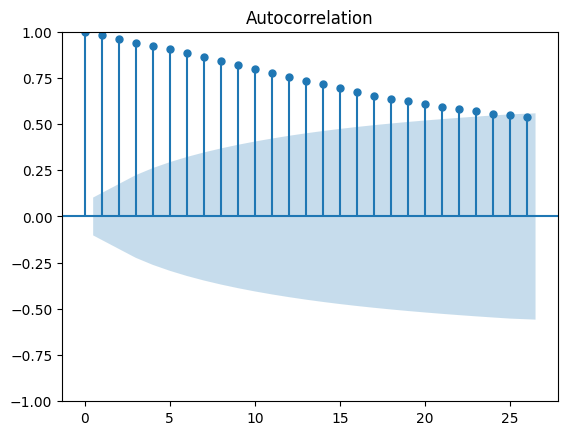

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data)
plt.show()

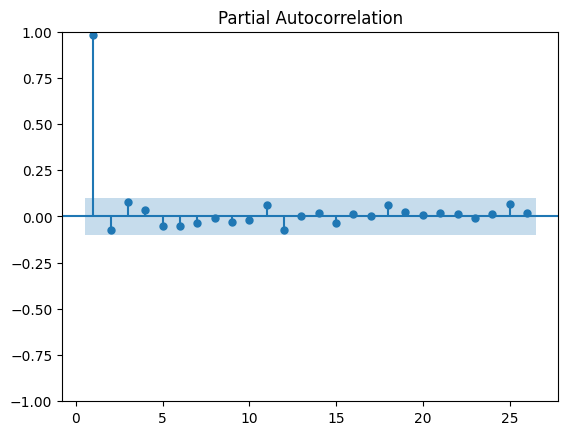

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data,zero=False)
plt.show()

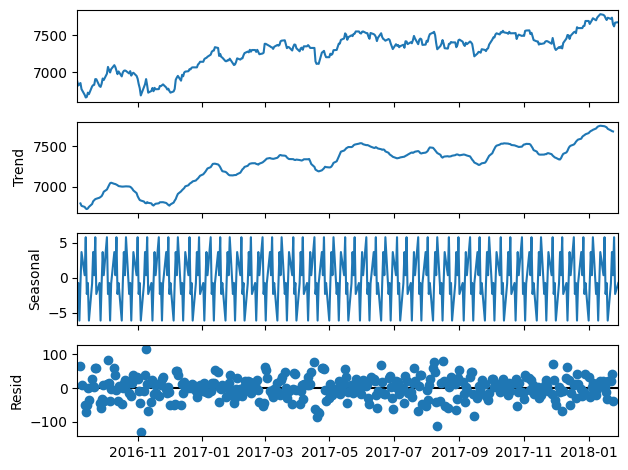

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = data
result = seasonal_decompose(series, model='additive',period=7)
result.plot()
pyplot.show()

#Applying models

In [ ]:
size = int(len(data)*0.8)
df, df_test = data.iloc[:size], data.iloc[size:]

In [ ]:
model=ARIMA(df,order=(1,1,1),seasonal_order=(1,1,1,7))

In [ ]:
results = model.fit()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions = results.predict(start=len(df+1), end= len(df)+len(df_test)-1, dynamic=False)
#print(len(predictions))
#for i in range(len(predictions)):
#print('predicted=%f, expected=%f' % (predictions[i], df_test.ftse[i]))
rmse = sqrt(mean_squared_error(df_test.ftse, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 117.948


In [ ]:
test=df_test

In [ ]:
test['prediction']=predictions

<ipython-input-19-9490a2583a1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=predictions


In [ ]:
test['difference']=test["ftse"]-test['prediction']
print(test)

                   ftse   prediction  difference
date                                            
2017-10-18  7542.866979  7512.959449   29.907530
2017-10-19  7523.038195  7521.026515    2.011680
2017-10-20  7523.225958  7515.331311    7.894647
2017-10-23  7524.452244  7519.711743    4.740501
2017-10-24  7526.543117  7511.422330   15.120787
...                 ...          ...         ...
2018-01-23  7731.827774  7665.826530   66.001244
2018-01-24  7643.428966  7665.012969  -21.584003
2018-01-25  7615.839954  7671.291959  -55.452005
2018-01-26  7665.541292  7666.138117   -0.596825
2018-01-29  7671.533300  7669.639941    1.893359

[74 rows x 3 columns]


<ipython-input-20-b4f71aa9568c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['difference']=test["ftse"]-test['prediction']


In [ ]:
df = pd.DataFrame({'Actual': test.ftse, 'Predicted': test.prediction})

<Axes: xlabel='date'>

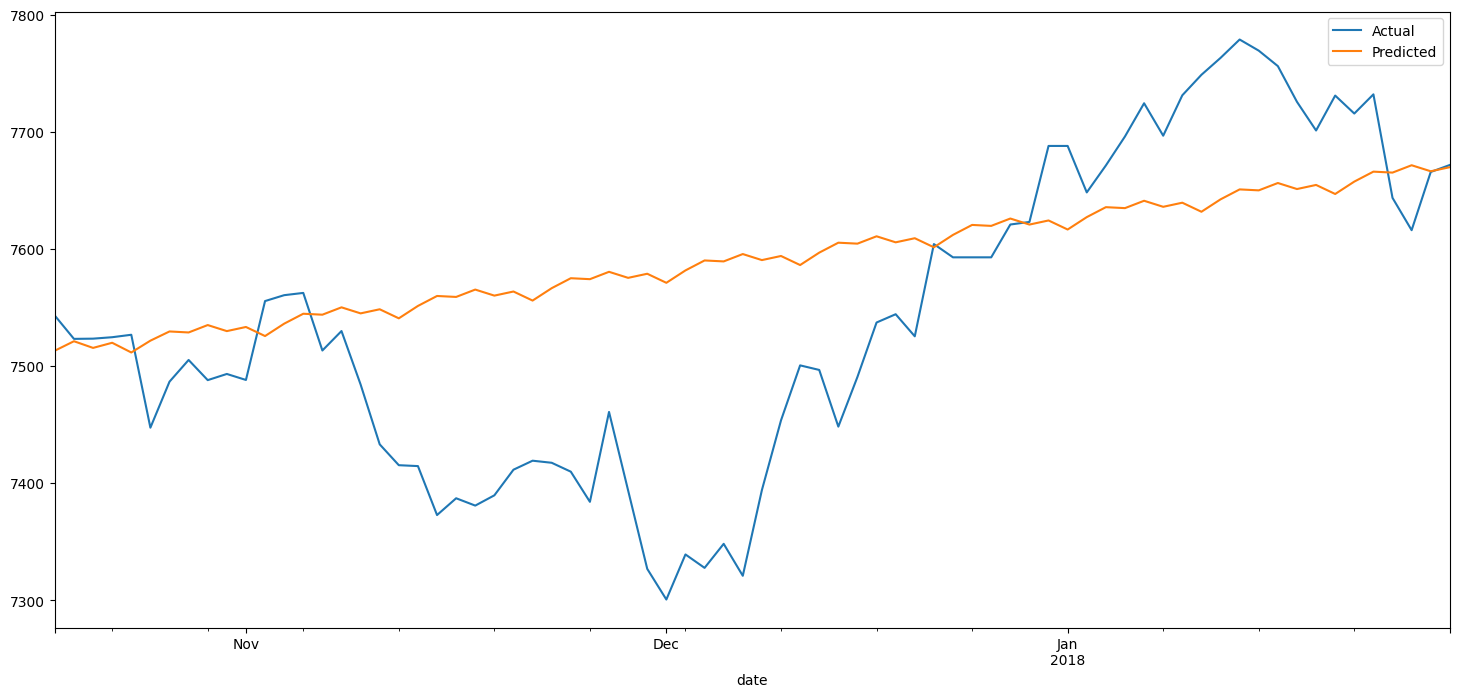

In [ ]:
df.plot(kind='line',figsize=(18,8))

In [ ]:
def train_test_split(data, n_train):
    return data[0:n_train], data[n_train:]

In [ ]:
def evaluate_arima_model(data, arima_order, train_data_size_percent = 0.8):
  # prepare training dataset
    train_size = int(len(data) * train_data_size_percent)
    train, test = train_test_split(data, train_size)
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error, test, predictions

In [ ]:
mse, test, predictions = evaluate_arima_model(data['ftse'], arima_order=(1, 1, 1))

In [ ]:
print("RMSE :",sqrt(mse))

RMSE : 35.97581079203832


In [ ]:
final=pd.DataFrame({"Actual":test,"Forecast":predictions},index=test.index)

In [ ]:
final

,Actual,Forecast
date,,
2017-10-18,7542.866979,7513.544353
2017-10-19,7523.038195,7546.907859
2017-10-20,7523.225958,7518.591926
2017-10-23,7524.452244,7526.407230
2017-10-24,7526.543117,7522.283034
...,...,...
2018-01-23,7731.827774,7713.036670
2018-01-24,7643.428966,7734.162834
2018-01-25,7615.839954,7636.216072


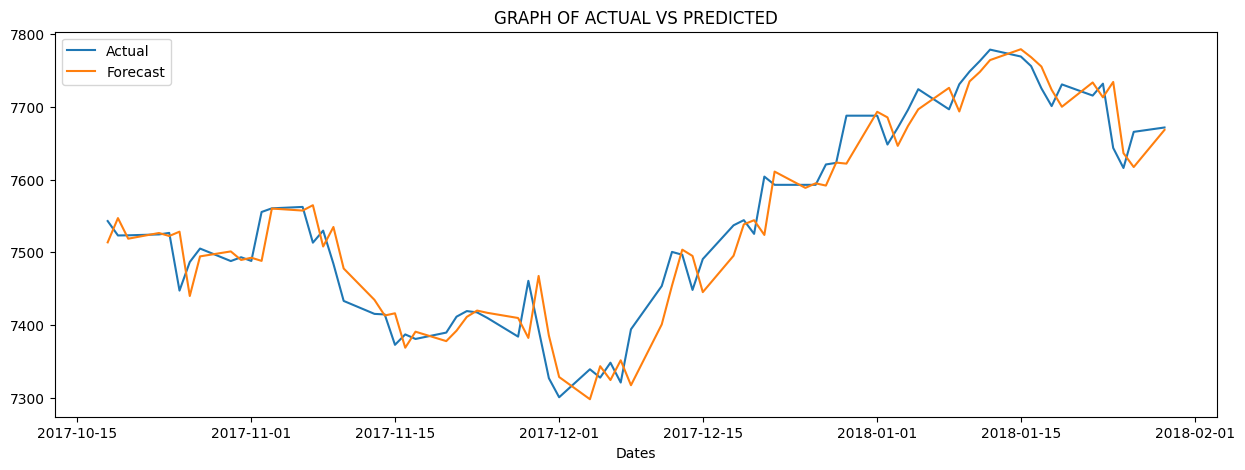

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(final.Actual, label='Actual')
plt.plot(final.Forecast, label = "Forecast")
plt.xlabel('Dates')
plt.title('GRAPH OF ACTUAL VS PREDICTED')
plt.legend()
plt.show()